# Final Project - Special Topics in BANA 8090

## German Credit Dataset

Data Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

German Credit data set classifies people in terms of good credit risk or bad credit risk. The german credit data set consists of 1000 observations and 21 features. The dependent variable name in this data set is y. “y” variable consists of two factors that are 0 (good credit risk) and 1 (bad credit risk).

Here, we try to fit Logistic Regression Model on the dataset and check its out-of-sample prediction accuracy.

## Solution

In [1]:
#Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation
from sklearn.linear_model import LogisticRegression

C:\Users\jatin\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


German Credit dataset has no headers for the columns, so we add our own column names as per the source of the data. Also, the response variable 'y' has output as 1 (Good risk people) and 2 (Bad risk people), we convert this to 0 and 1 by subtracting 1.

In [2]:
#Reading German dataset

germancol=["chk_acct", "duration", "credit_his", "purpose", "amount", "saving_acct", "present_emp", "installment_rate", "sex",\
              "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", \
              "telephone", "foreign", "y"]

german = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", \
                       header=None, names = germancol, delimiter = " ")

german["y"] = german["y"]-1

### Dataset Preview

In [3]:
german.head(10)

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


### Data Summary

In [4]:
#Summary for numeric variables

german.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,n_people,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [5]:
#Count of variables for different data types
dtype_df = german.dtypes.reset_index()

dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,8
1,object,13


In [6]:
#Finding missing values in the dataset

missing_df = german.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


From the above activity, we found out that the dataset consists of 13 'object' predictors and 7 'integer' predictors. 
Response variable is also in the form of 'integer'.

Dataset is clean and we found no missing values.

### Exploratory Data Analysis

In [7]:
def germanhist(l,j):
    try:
        g = l.groupby(german['y'])
        plt.hist(l, bins='auto', color='green')  # arguments are passed to np.histogram
        plt.title("Histogram: "+str(j))
        plt.show()
    except TypeError:
        print "This is not the correct datatype"


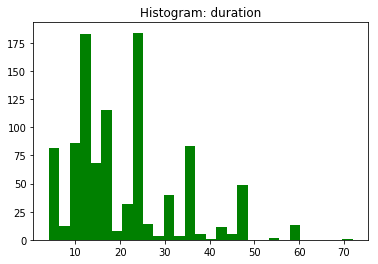

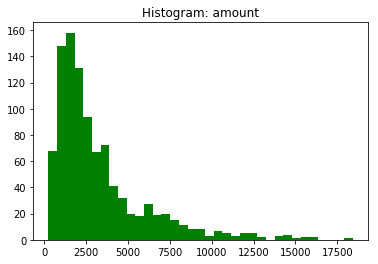

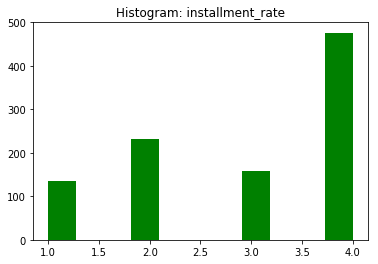

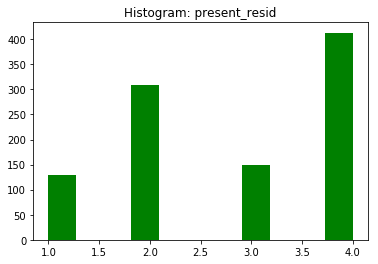

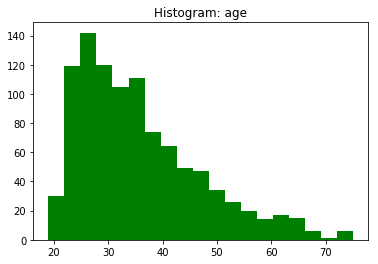

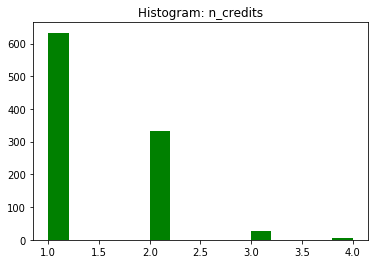

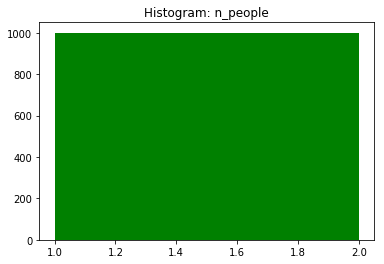

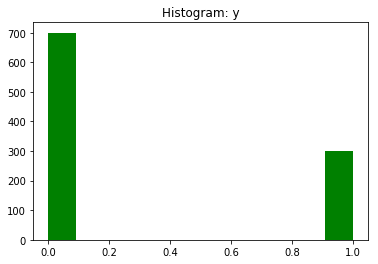

In [8]:
#Histograms for each numeric variable (including response variable)
for i in (german):
    if german[i].dtype=='int64':
        germanhist(german[i],i)
        

In [9]:
#Grouping by response variable to see mean values for each numeric predictor
german.groupby('y').mean()

,duration,amount,installment_rate,present_resid,age,n_credits,n_people
y,,,,,,,
0,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
1,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333


### Data Manipulation - converting 'object' variables to numeric type using LabelEncoder()

In [10]:
#Preview of 'object' variables
X = german.select_dtypes(include=[object])
X.head(5)

,chk_acct,credit_his,purpose,saving_acct,present_emp,sex,other_debtor,property,other_install,housing,job,telephone,foreign
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [11]:
#Converting strings to numeric values 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_2 = X.apply(le.fit_transform)
X_2.head()


,chk_acct,credit_his,purpose,saving_acct,present_emp,sex,other_debtor,property,other_install,housing,job,telephone,foreign
0,0,4,4,4,4,2,0,0,2,1,2,1,0
1,1,2,4,0,2,1,0,0,2,1,2,0,0
2,3,4,7,0,3,2,0,0,2,1,1,0,0
3,0,2,3,0,3,2,2,1,2,2,2,0,0
4,0,3,0,0,2,2,0,3,2,2,2,0,0


In [12]:
#Replacing converted variables in original data
for i in german:
    for j in X_2:
        if i==j:
            german[i]=X_2[j]

### Data Preparation for Modeling

We split the data in training and testing datasets with 80% and 20% observations

In [13]:
# Splitting data into training and testing datasets

train, test = sklearn.cross_validation.train_test_split(german, train_size = 0.8)

print "Training dataset length: " + str(len(train))
print "Testing dataset length: " + str(len(test))

y_train = train['y']
train = train.drop('y',1)

y_test = test['y']
test = test.drop('y',1)

Training dataset length: 800
Testing dataset length: 200


### Preparing Logistic Regression Model based on training data and checking out-of-sample prediction accuracy

In [14]:

logreg = LogisticRegression()
logreg.fit(train, y_train)
y_pred = logreg.predict(test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


### Proposed Model

In [15]:
#Coefficients for final model
coefficients = pd.DataFrame({"Feature":train.columns,"Coefficients":np.transpose(logreg.coef_[0])})
coefficients

,Coefficients,Feature
0,-0.607086,chk_acct
1,0.034376,duration
2,-0.370404,credit_his
3,-0.038461,purpose
4,0.000059,amount
5,-0.224938,saving_acct
6,-0.107473,present_emp
7,0.318211,installment_rate
8,-0.101811,sex
9,-0.499877,other_debtor
